In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [6]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [8]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


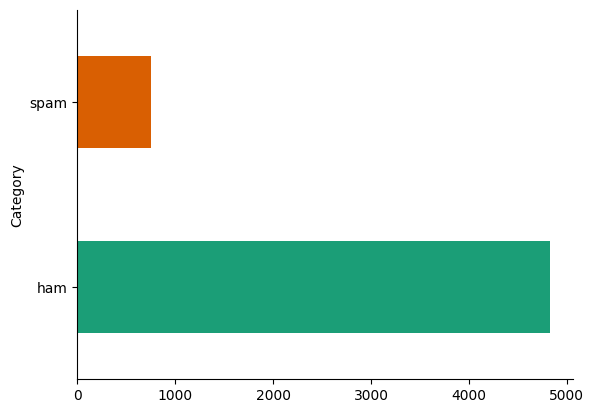

In [9]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
mail_data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

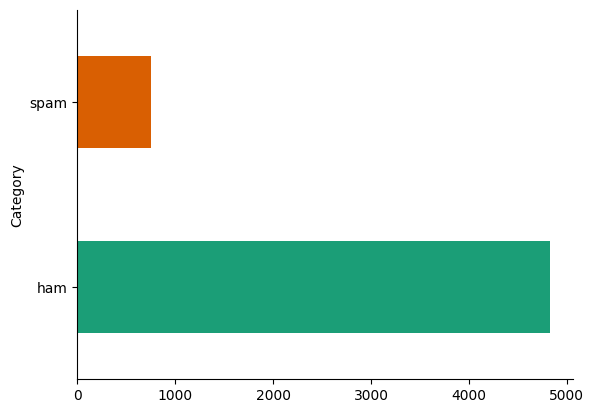

In [10]:


from matplotlib import pyplot as plt
import seaborn as sns
mail_data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

In [12]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [13]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [14]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [15]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [17]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with appropriate parameters
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Transform the training and testing text data to feature vectors
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Ensure target variables are of integer type
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [19]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [20]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [21]:
model = LogisticRegression()

In [22]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [26]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [27]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9670181736594121


In [28]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [29]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9659192825112107


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming input_mail is your sample for demonstration and you have X_test, y_test for evaluation

# Sample input for demonstration
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making prediction for sample
prediction = model.predict(input_data_features)
print(prediction)

# Output class based on prediction
if (prediction[0]==1):
    print('non-spam mail')
else:
    print('Spam mail')




[1]
non-spam mail


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

# prediction on training data
prediction_on_training_data = model.predict(X_train_features)

# Calculating different evaluation metrics on training data
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
precision_on_training_data = precision_score(Y_train, prediction_on_training_data)
recall_on_training_data = recall_score(Y_train, prediction_on_training_data)
f1_on_training_data = f1_score(Y_train, prediction_on_training_data)
conf_matrix_training = confusion_matrix(Y_train, prediction_on_training_data)

# Displaying training metrics
print('Accuracy on training data : ', accuracy_on_training_data)
print('Precision on training data: ', precision_on_training_data)
print('Recall on training data: ', recall_on_training_data)
print('F1 Score on training data: ', f1_on_training_data)
print('Confusion Matrix on training data:\n', conf_matrix_training)

# prediction on test data
prediction_on_test_data = model.predict(X_test_features)

# Calculating different evaluation metrics on test data
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
precision_on_test_data = precision_score(Y_test, prediction_on_test_data)
recall_on_test_data = recall_score(Y_test, prediction_on_test_data)
f1_on_test_data = f1_score(Y_test, prediction_on_test_data)
conf_matrix_test = confusion_matrix(Y_test, prediction_on_test_data)

# Displaying test metrics
print('Accuracy on test data : ', accuracy_on_test_data)
print('Precision on test data: ', precision_on_test_data)
print('Recall on test data: ', recall_on_test_data)
print('F1 Score on test data: ', f1_on_test_data)
print('Confusion Matrix on test data:\n', conf_matrix_test)

# Prediction for a new email
input_mail = ["I've been searching for the right words to thank you for this breather. I promise I won't take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_data_features = feature_extraction.transform(input_mail)  # convert text to feature vectors
prediction = model.predict(input_data_features)
print('Prediction:', 'non-spam mail' if prediction[0] == 1 else 'Spam mail')


Accuracy on training data :  0.9670181736594121
Precision on training data:  0.9642857142857143
Recall on training data:  0.9989650711513584
F1 Score on training data:  0.98131910026687
Confusion Matrix on training data:
 [[ 449  143]
 [   4 3861]]
Accuracy on test data :  0.9659192825112107
Precision on test data:  0.9619238476953907
Recall on test data:  1.0
F1 Score on test data:  0.9805924412665985
Confusion Matrix on test data:
 [[117  38]
 [  0 960]]
Prediction: non-spam mail


In [ ]:
from sklearn import svm

# Replace the LogisticRegression with SVM
model2 = svm.SVC(kernel='linear')

In [ ]:
model2.fit(X_train_features, Y_train)

SVC(kernel='linear')

In [ ]:
prediction_on_training_data = model2.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)


Accuracy on training data :  0.9952883105227731
